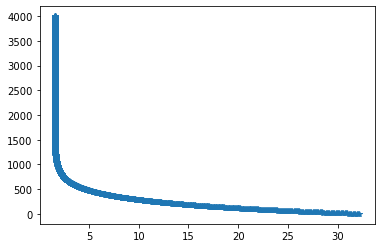

In [6]:
import numpy as np
import matplotlib.pyplot as plt

p = 0
class MSE:
  def calculate(self, model, y_ds, x_ds):
    return sum([(e[0] - model(e[1]))**2 for e in zip(y_ds, x_ds)])/(2*len(y_ds))

  def gradient(self, model, x_ds, y_ds):
    grads = [0] * len(y_ds)
    flag = 0
    for i in x_ds:
      grads[flag] = sum([(e[0] - model(e[1])) * (-1 * i[flag]) for e in zip(y_ds, x_ds)]) / (len(y_ds))
      flag = flag + 1
    return grads
class RMSE:
  def calculate(self, model, y_ds, x_ds):
    return (sum([(e[0] - model(e[1]))**2 for e in zip(y_ds, x_ds)])/(2*len(y_ds)))**(1/2)

  def gradient(self, model, x_ds, y_ds):
    mse = sum([(e[0] - model(e[1]))**2 for e in zip(y_ds, x_ds)])/(2*len(y_ds))
    mse_w0 = sum([(e[0] - model(e[1]))*(-1) for e in zip(y_ds, x_ds)])/(len(y_ds))
    mse_w1 = sum([(e[0] - model(e[1]))*(-e[1]) for e in zip(y_ds, x_ds)])/(len(y_ds))
    grad_w0 = (1 / 2 * (mse) ) * mse_w0
    grad_w1 = (1 / 2 * (mse) ) * mse_w1
    return grad_w0, grad_w1

class Multidimensional:
  def __init__(self, error, x_ds, y_ds, alpha, iter):
    self.error = error
    self.x_ds = x_ds
    self.y_ds = y_ds
    self.w = np.random.rand(len(y_ds))
    self.dim = len(y_ds)
    self.alpha = alpha
    self.lossList = []
    self.time = []
    self.iter = iter
  
  def model(self, x):
    for i in range(p + 1):
      
      return np.dot(self.w, x) # ---> w^T x [x_0, x_0, x_0] = Y

  def execute(self):
    loss = self.error.calculate(self.model, self.y_ds, self.x_ds)
    i = 0
    while(i < self.iter):
      grads = self.error.gradient(self.model, self.x_ds, self.y_ds)
      for j in range(self.dim):
        self.w[j] = self.w[j] - self.alpha * grads[j]
      loss = self.error.calculate(self.model, self.y_ds, self.x_ds)
      self.lossList.append(loss)
      self.time.append(i)
      i = i + 1

  def plotear(self):
    plt.plot(self.lossList, self.time, '*')

  def show(self):
    y_pd = [self.model(i) for i in self.x_ds[0]]
    plt.plot(self.x_ds, self.y_ds, '*')
    plt.plot(self.x_ds, y_pd)


x_ds = np.random.rand(10, 100)
y_ds = [i+ np.random.normal(0,2) for i in x_ds[0]]
error = MSE()
model = Multidimensional(error, x_ds, y_ds, 0.007, 4000)
model.execute()
model.plotear()